In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

### Read data from the csv into usable arrays

In [2]:
csv_filename = 'wineData.csv'

# Initialize arrays
time_values = []
bottle_a = []
bottle_b = []

# read data from file
with open(csv_filename, 'r') as file:
    reader = csv.reader(file, delimiter=',')
    rows = list(reader)
    if len(rows) >= 3:
        time_values = list(map(int, rows[0][1:]))  # Skip the first entry (name/label)
        bottle_a = list(map(float, rows[1][1:]))
        bottle_b = list(map(float, rows[2][1:]))
    else:
        print("Error: Expected at least 3 rows in the CSV file.")

### Cubic Splines Interpolation

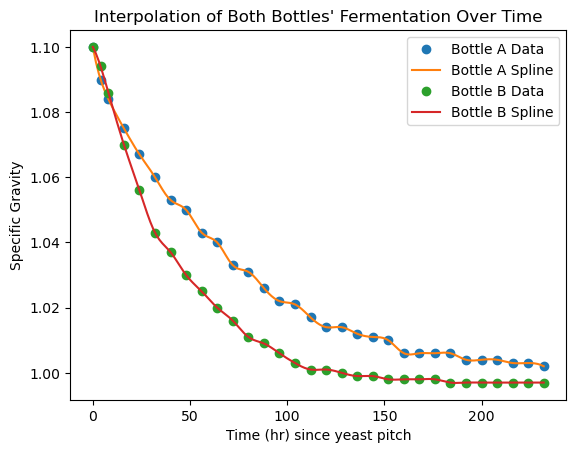

In [55]:
bottleA_spline = CubicSpline(time_values, bottle_a)
bottleB_spline = CubicSpline(time_values, bottle_b)

# Plot the two next to each other
x_fine = np.linspace(0, time_values[-1], 150)
y_fine_a = bottleA_spline(x_fine)
y_fine_b = bottleB_spline(x_fine)
plt.plot(time_values, bottle_a, 'o', label = "Bottle A Data")
plt.plot(x_fine, y_fine_a, label="Bottle A Spline")
plt.plot(time_values, bottle_b, 'o', label = "Bottle B Data")
plt.plot(x_fine, y_fine_b, label = "Bottle B Spline")
plt.legend()
plt.xlabel("Time (hr) since yeast pitch")
plt.ylabel("Specific Gravity")
plt.title("Interpolation of Both Bottles' Fermentation Over Time")
plt.show()

### Newton's Method adapted for working with Cubic Splines as inputs
This function is essentially the same as used in class

In [26]:
def newtonsmethod(f, df, x_k, n, err):     #n is number of iterations
    p_hat = 999999999
    #iteration loop for numerical approx solver
    #start off with intercept in range(1:n) such that n is
    # the total number of iterations
    for intercept in range(1,n):
        f_x = float(f(x_k))
        df_x = float(df(x_k))
        i = x_k - f_x/df_x # use i for next iteration                  
        if abs(x_k - i) <= err:
            break
        x_k = i # update current x val
    return i

### Calculate Sugar Breaks
1. Find the specific gravities corresponding to 1/3 and 2/3 of the sugar being gone
2. Construct Cubic Splines identical to the main ones, shifted down by the sugar break we want to approxomate
3. Apply Newton's Method to those interpolating splines

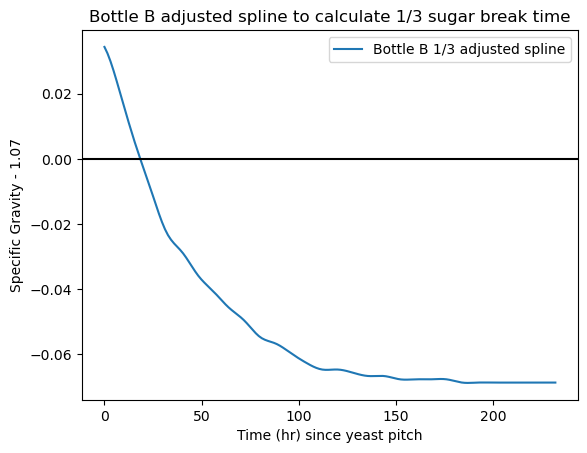

In [58]:
# get our line for 1/3 and 2/3 sugar breaks
sb_a1 = bottle_a[0] - (bottle_a[0] - bottle_a[-1]) / 3
sb_a2 = bottle_a[-1] + (bottle_a[0] - bottle_a[-1]) / 3
sb_b1 = bottle_b[0] - (bottle_b[0] - bottle_b[-1]) / 3
sb_b2 = bottle_b[-1] + (bottle_b[0] - bottle_b[-1]) / 3

# adapted splines with roots at desired levels
a1_spline = CubicSpline(time_values, list(map(lambda x: x - sb_a1, bottle_a)))
a2_spline = CubicSpline(time_values, list(map(lambda x: x - sb_a2, bottle_a)))
b1_spline = CubicSpline(time_values, list(map(lambda x: x - sb_b1, bottle_b)))
b2_spline = CubicSpline(time_values, list(map(lambda x: x - sb_b2, bottle_b)))

# plot an adapted spline for display
adj_b1_fine = b1_spline(x_fine)
plt.plot(x_fine, adj_b1_fine, label='Bottle B 1/3 adjusted spline')
plt.legend()
plt.axhline(y=0, color='black')
plt.xlabel("Time (hr) since yeast pitch")
plt.ylabel("Specific Gravity - " + str(round(sb_b1, 2)))
plt.title("Bottle B adjusted spline to calculate 1/3 sugar break time")
plt.show()


# actually calculating the time cooresponding to the sugar breaks
first_break_a = newtonsmethod(a1_spline, a1_spline.derivative(), 20, 20, 0.05)
second_break_a = newtonsmethod(a2_spline, a2_spline.derivative(), 50, 20, 0.05)
first_break_b = newtonsmethod(b1_spline, b1_spline.derivative(), 20, 20, 0.05)
second_break_b = newtonsmethod(b2_spline, b2_spline.derivative(), 50, 20, 0.05)

### Plotting Bottle A's calculated breaks

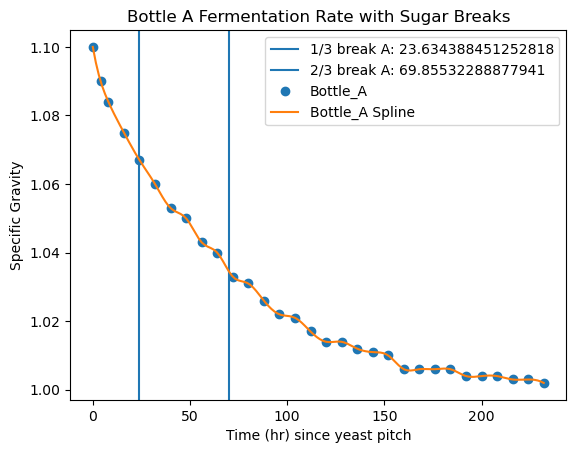

In [51]:
plt.axvline(x=first_break_a, label='1/3 break A: '+str(first_break_a))
plt.axvline(x=second_break_a, label='2/3 break A: '+str(second_break_a))
plt.plot(time_values, bottle_a, 'o', label = "Bottle_A")
plt.plot(x_fine, y_fine_a, label = "Bottle_A Spline")
plt.legend()
plt.xlabel("Time (hr) since yeast pitch")
plt.ylabel("Specific Gravity")
plt.title("Bottle A Fermentation Rate with Sugar Breaks")
plt.show()

### Plotting Bottle B's Calculated Sugar Breaks

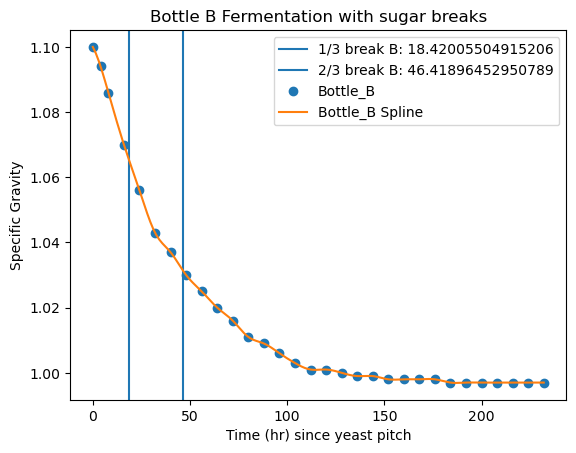

In [52]:
plt.axvline(x=first_break_b, label='1/3 break B: '+str(first_break_b))
plt.axvline(x=second_break_b, label='2/3 break B: '+str(second_break_b))
plt.plot(time_values, bottle_b, 'o', label = "Bottle_B")
plt.plot(x_fine, y_fine_b, label = "Bottle_B Spline")
plt.legend()
plt.xlabel("Time (hr) since yeast pitch")
plt.ylabel("Specific Gravity")
plt.title("Bottle B Fermentation with sugar breaks")
plt.show()

### Tester Code for Sugar Break Calculations
Not particularly important to the overall product but I did use it

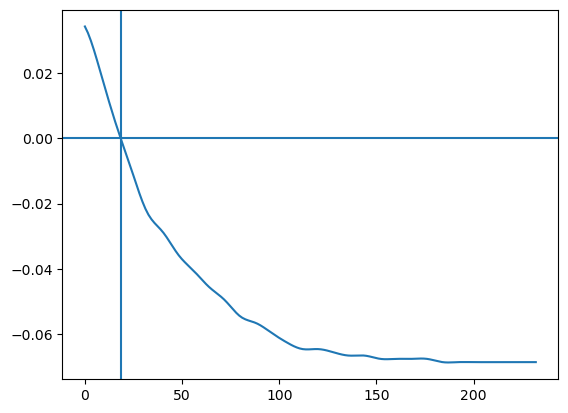

In [53]:
b2_fine = b1_spline(x_fine)
plt.plot(x_fine, b2_fine, label = "b1 fine")
plt.axvline(x = first_break_b)
plt.axhline(y=0)
plt.show()